# Open Data Analysis
**Задание:** проанализировать отĸрытый массив данных на свой выбор. 

**Цель задания:** на праĸтиĸе познаĸомиться с pandas, попробовать поработать с
"реальными" данными и потренироваться в представлении результатов своих
исследований.

**Критерии успеха:** задание опционально, ĸритерием успеха является
проанализированный (с использованием jupyter notebook, pandas и т.п.) ĸаĸим-
угодно образом массив данных, заинтересовавший студента. Далее успешность определяется review.

## Выбор набора данных

Для анализа выбран датасет Crash Data.

ссылка: https://data.townofcary.org/api/odata/cpd-crash-incidents/

Набор данных содержит информацию о сбоях за последние пять лет по текущую дату.

Данные основаны на Национальной системе отчетности на основе инцидентов (NIBRS). Данные являются динамическими, что позволяет добавлять, удалять и модифицировать их в любое время, что приводит к более точной информации в базе данных. В связи с постоянным вводом данных номера записей при последующих извлечениях могут быть изменены.

Набор данных обновляется ежедневно, поэтому указываю время загрузки версии в этой работе: 27-11-2022

Подробное описание атрибутов(столбцов) каждой записи представлено на странице датасета в разделе DATASET SCHEMA. Поскольку всего атрибутов 47, все перечислять здесь бессмысленно. Для построения статистических графиков будут использованы некоторые самые простые для понимания атрибуты.

## Обзор набора данных

In [ ]:
import pandas as pd

# Загрузим данные из cvs
data_path = r"/content/drive/MyDrive/ОТУС_Python_Pro(обучение)/11_pandas/homework/cpd-crash-incidents.csv"
dataset = pd.read_csv(data_path)  

In [ ]:
# Первые 5 строк набора
dataset.head()

,tamainid,Location Description,Road Feature,Road Character,Road Class,Road Configuration,Road Surface,Road Conditions,Light Condition,Weather,...,Fatalities,Injuries,Month,contrfact1,contrfact2,Contributing Factor,vehicleconcat1,vehicleconcat2,vehicleconcat3,Vehicle Type
0,27462,CARY,NO SPECIAL FEATURE,"STRAIGHT,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,WET,DARK - LIGHTED ROADWAY,RAIN,...,No,No,1,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR"
1,27464,127 FEET FROM PVA 200 DOMINION OAK CIR,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,WET,DARK - LIGHTED ROADWAY,RAIN,...,No,No,1,NONE,"NONE,NONE","NONE,NONE","UNKNOWN,PASSENGER CAR","UNKNOWN,PASSENGER CAR","UNKNOWN,PASSENGER CAR","UNKNOWN,PASSENGER CAR"
2,27466,CARY,FOUR-WAY INTERSECTION,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,WET,DARK - LIGHTED ROADWAY,RAIN,...,No,No,1,NONE,"NONE,COMING FROM BEHIND PARKED VEHICLE","NONE,COMING FROM BEHIND PARKED VEHICLE","VAN,PASSENGER CAR","VAN,PASSENGER CAR","VAN,PASSENGER CAR","VAN,PASSENGER CAR"
3,27474,1 MILES FROM US 64,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,WET,DARK - ROADWAY NOT LIGHTED,CLOUDY,...,No,No,1,NONE,"NONE,NONE","NONE,NONE",PASSENGER CAR,PASSENGER CAR,PASSENGER CAR,PASSENGER CAR
4,27487,CARY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",CONCRETE,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,No,No,1,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR"


In [8]:
# Перечень столбцов
for column in dataset.columns:
    print(column)

tamainid
Location Description
Road Feature
Road Character
Road Class
Road Configuration
Road Surface
Road Conditions
Light Condition
Weather
Traffic Control
lat
lon
lon2
lat2
tract
Beat
Fatality
Injury
Number of Passengers
Number of Pedestrians
Contributing Factor 1
Contributing Factor 2
Contributing Factor 3
Contributing Factor 4
Vehicle 1
Vehicle 2
Vehicle 3
Vehicle 4
Vehicle 5
Work Area
Records
TA_Date
TA_Time
Crash Date/Time
Geo_Location
Crash Date - Year
Fatalities
Injuries
Month
contrfact1
contrfact2
Contributing Factor
vehicleconcat1
vehicleconcat2
vehicleconcat3
Vehicle Type


In [10]:
# Количество столбцов(атрибутов инцидента)
len(dataset.columns)

47

In [6]:
# Количественная информация о содержимом датасета
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25765 entries, 0 to 25764
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamainid               25765 non-null  int64  
 1   Location Description   25762 non-null  object 
 2   Road Feature           25106 non-null  object 
 3   Road Character         25118 non-null  object 
 4   Road Class             25123 non-null  object 
 5   Road Configuration     25036 non-null  object 
 6   Road Surface           25132 non-null  object 
 7   Road Conditions        25120 non-null  object 
 8   Light Condition        25152 non-null  object 
 9   Weather                25148 non-null  object 
 10  Traffic Control        25083 non-null  object 
 11  lat                    5886 non-null   float64
 12  lon                    5886 non-null   float64
 13  lon2                   25036 non-null  float64
 14  lat2                   25000 non-null  float64
 15  tr

## Статистика по количеству дорожных проишествий по годам

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

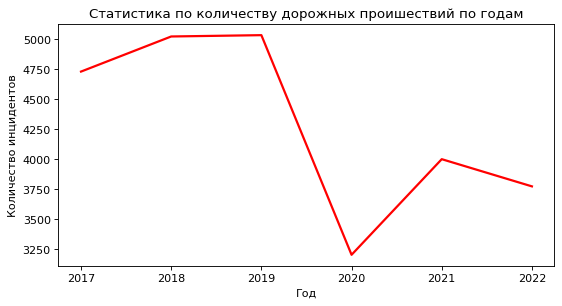

In [23]:
# Создание рисунка размером 10x8 дюймов, 60 точек на дюйм
plt.figure(figsize=(8, 4), dpi=80) 

# Создание области рисования 1x1
plt.subplot(1, 1, 1) 

# Данные для графика
dates=dataset["Crash Date - Year"].unique()
values=dataset.groupby(['Crash Date - Year']).size()

plt.title("Статистика по количеству дорожных проишествий по годам")
plt.ylabel("Количество инцидентов")
plt.xlabel("Год")

plt.plot(dates,values, color="red", linewidth=2.0)
plt.show()

## Статистика по количеству дорожных проишествий по месяцам

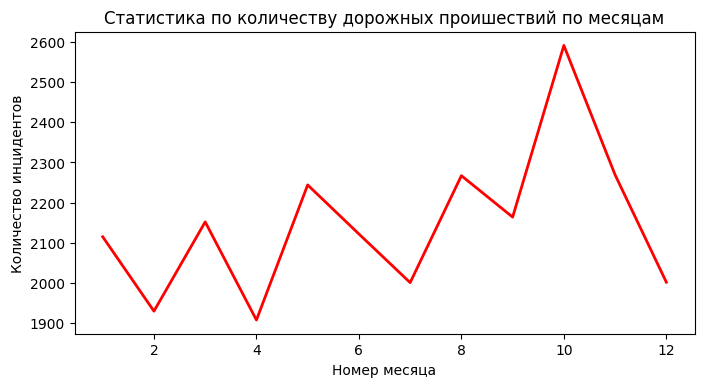

In [44]:
plt.figure(figsize=(8, 4), dpi=100) 
plt.subplot(1, 1, 1) 

# Данные для графика
dates=dataset["Month"].unique()
values=dataset.groupby(['Month']).size()

plt.title("Статистика по количеству дорожных проишествий по месяцам")
plt.ylabel("Количество инцидентов")
plt.xlabel("Номер месяца")

plt.plot(dates,values, color="red", linewidth=2.0)
plt.show()


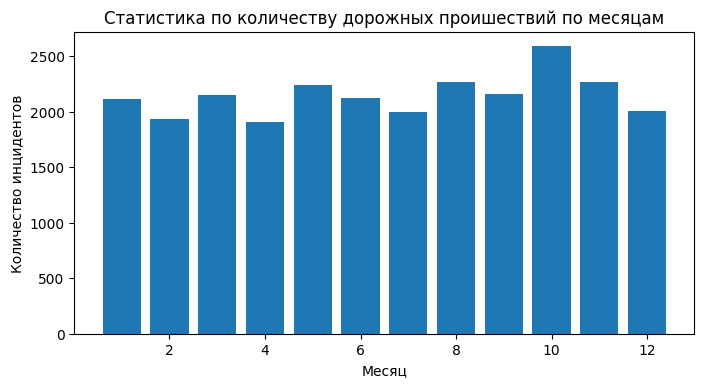

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

# Данные для графика
dates = dataset["Month"].unique()
values = dataset.groupby(['Month']).size()

bar_labels = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 
              'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

ax.bar(dates, values, label=bar_labels, )

ax.set_ylabel('Количество инцидентов')
ax.set_xlabel('Месяц')
ax.set_title('Статистика по количеству дорожных проишествий по месяцам')

plt.show()

## Зависимость количества пострадавших/погибших от состояния дороги

Проанализируем как влияет условие состояния дороги(ROAD CONDITIONS) на наличие погибших(FATALITIES) и пострадавших(INJURIES) в результате инфидента

ROAD CONDITIONS атрибут может иметь следующие значения

* DRY
* WET
* UNKNOWN
* WATER (STANDING, MOVING)
* ICE
* SNOW
* SAND, MUD, DIRT, GRAVEL
* SLUSH
* OTHER
* FUEL, OIL

Fatalities и Injuries хранят значения Yes\No по наличию пострадавших\погибших

In [65]:
dataset[dataset['Fatalities'] =='Yes'].groupby(['Road Conditions']).size()

Road Conditions
DRY                         37
WATER (STANDING, MOVING)     1
WET                          3
dtype: int64

In [73]:
dataset[dataset['Injuries'] =='Yes'].groupby(['Road Conditions']).size()

Road Conditions
DRY                         2813
FUEL, OIL                      1
ICE                            5
SNOW                           4
UNKNOWN                        2
WATER (STANDING, MOVING)      12
WET                          490
dtype: int64

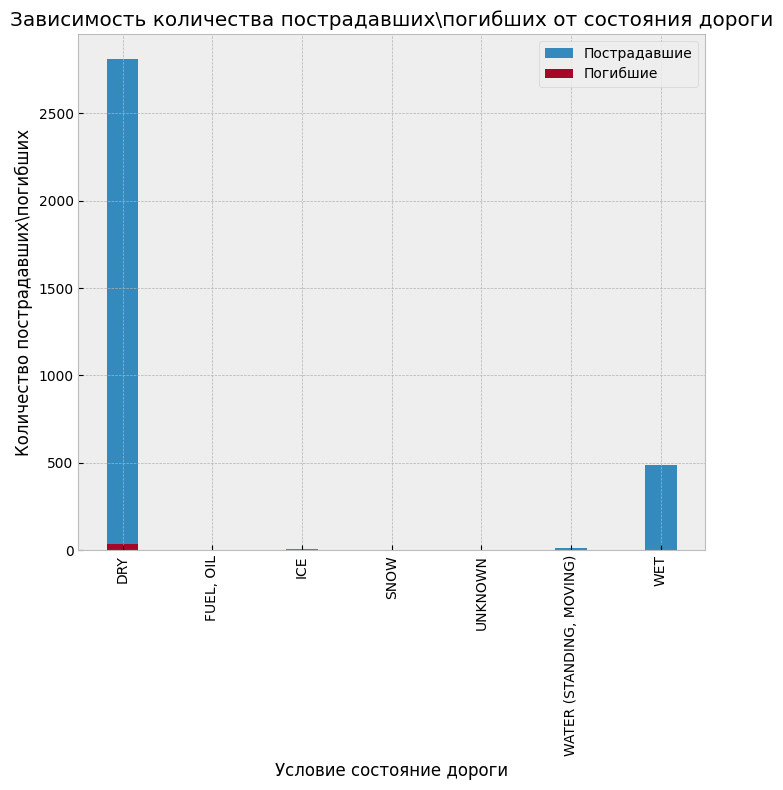

In [151]:
# Данные для графика
injuries_by_rcond = dataset[dataset['Injuries'] =='Yes'].groupby(['Road Conditions']).size()
fatalities_by_rcond = dataset[dataset['Fatalities'] =='Yes'].groupby(['Road Conditions']).size()
road_conditions = dataset["Road Conditions"].unique()

with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

    rects1 = ax.bar(injuries_by_rcond.keys(), 
                    injuries_by_rcond.values, 
                    width = 0.35, 
                    label='Пострадавшие')

    rects2 = ax.bar(fatalities_by_rcond.keys(), 
                    fatalities_by_rcond.values, 
                    width = 0.35, 
                    label='Погибшие')

    ax.set_ylabel('Количество пострадавших\погибших')
    ax.set_xlabel('Условие состояние дороги')
    ax.set_title('Зависимость количества пострадавших\погибших от состояния дороги')

    ax.legend()
    plt.xticks(rotation = 90)
    fig.tight_layout()

    plt.show()

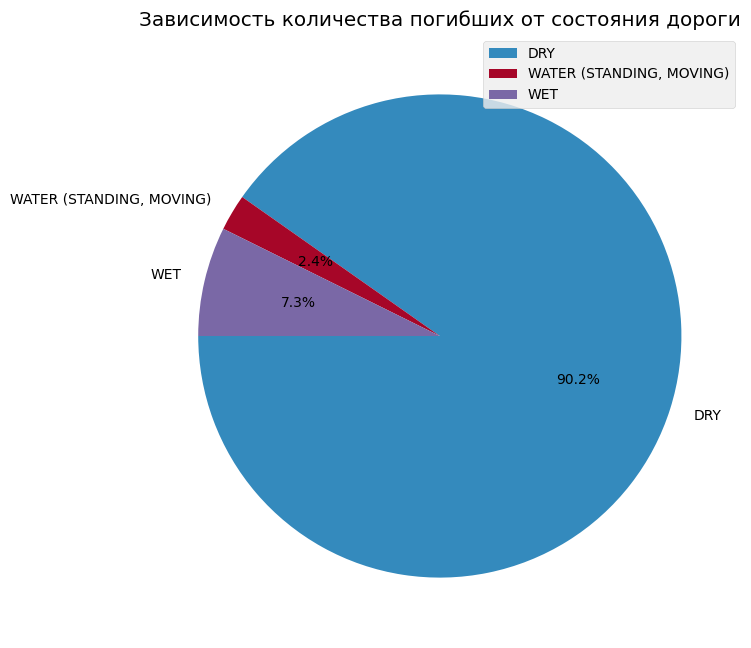

In [156]:
import matplotlib.pyplot as plt

overall_ratios = fatalities_by_rcond.values
labels = fatalities_by_rcond.keys()
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    fig.subplots_adjust(wspace=0)
    angle = -180 * overall_ratios[0]
    wedges, *_ = ax.pie(overall_ratios, 
                        autopct='%1.1f%%', 
                        startangle=angle,
                        labels=labels, )
    
    ax.set_title('Зависимость количества погибших от состояния дороги')
    ax.legend()

    plt.show()

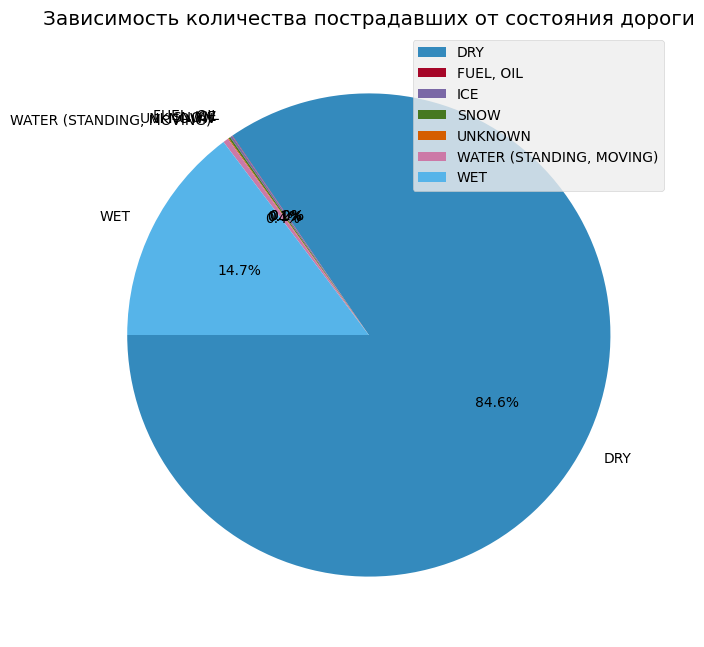

In [164]:
overall_ratios = injuries_by_rcond.values
labels = injuries_by_rcond.keys()
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    fig.subplots_adjust(wspace=0)
    angle = -180 * overall_ratios[0]
    wedges, *_ = ax.pie(overall_ratios, 
                        autopct='%1.1f%%', 
                        startangle=angle,
                        labels=labels, )

    ax.set_title('Зависимость количества пострадавших от состояния дороги')
    ax.legend()


    plt.show()

## Статистика по типам транспортных средств, участвовавших в проишествии

В датасете есть атрибуты Vehicle 1 - 5 обозначающие тип транспортных средств,учавствовавших в проишествии. То есть в проишествиях регистрируются до 5 машин. Чтобы собрать статистику по типам транспортных средств, надо объединить эти колонки. Для этого воспользуемся выборкой по датафрейму

In [165]:
# All Vehicle Types
all_vehicle_types = pd.concat([dataset.groupby(['Vehicle 1']).size(),
                               dataset.groupby(['Vehicle 2']).size(),
                               dataset.groupby(['Vehicle 3']).size(),
                               dataset.groupby(['Vehicle 4']).size(),
                               dataset.groupby(['Vehicle 5']).size(),
                               ])
all_vehicle_types

ACTIVITY BUS                              3
EMS VEHICLE- AMBULANCE- RESCUE SQUAD     18
FARM TRACTOR                              1
FIRETRUCK                                18
LIGHT TRUCK (MINI-VAN- PANEL)           261
                                       ... 
VAN                                       5
PASSENGER CAR                            15
PICKUP                                    5
SPORT UTILITY                            12
VAN                                       5
Length: 62, dtype: int64

In [166]:
all_vehicle_types.keys()

Index(['ACTIVITY BUS', 'EMS VEHICLE- AMBULANCE- RESCUE SQUAD', 'FARM TRACTOR',
       'FIRETRUCK', 'LIGHT TRUCK (MINI-VAN- PANEL)', 'MOPED',
       'MOTOR HOME/RECREATIONAL VEHICLE', 'MOTOR SCOOTER OR MOTOR BIKE',
       'OTHER *', 'PASSENGER CAR', 'PICKUP', 'POLICE', 'SCHOOL BUS',
       'SINGLE UNIT TRUCK (2-AXLE- 6-TIRE)',
       'SINGLE UNIT TRUCK (3 OR MORE AXLES)', 'SPORT UTILITY', 'TAXICAB',
       'TRACTOR/SEMI-TRAILER', 'TRUCK/TRAILER', 'UNKNOWN',
       'UNKNOWN HEAVY TRUCK', 'VAN', 'ALL TERRAIN VEHICLE (ATV)', 'AUTOCYCLE',
       'EMS VEHICLE- AMBULANCE- RESCUE SQUAD', 'FARM EQUIPMENT',
       'FARM TRACTOR', 'FIRETRUCK', 'LIGHT TRUCK (MINI-VAN- PANEL)', 'MOPED',
       'MOTOR HOME/RECREATIONAL VEHICLE', 'OTHER *', 'PASSENGER CAR', 'PICKUP',
       'POLICE', 'SCHOOL BUS', 'SINGLE UNIT TRUCK (2-AXLE- 6-TIRE)',
       'SPORT UTILITY', 'TRACTOR/SEMI-TRAILER',
       'TRUCK/TRACTOR (I.E.- BOBTAIL)', 'TRUCK/TRAILER', 'UNKNOWN',
       'UNKNOWN HEAVY TRUCK', 'VAN', 'LIGHT TRUCK (M

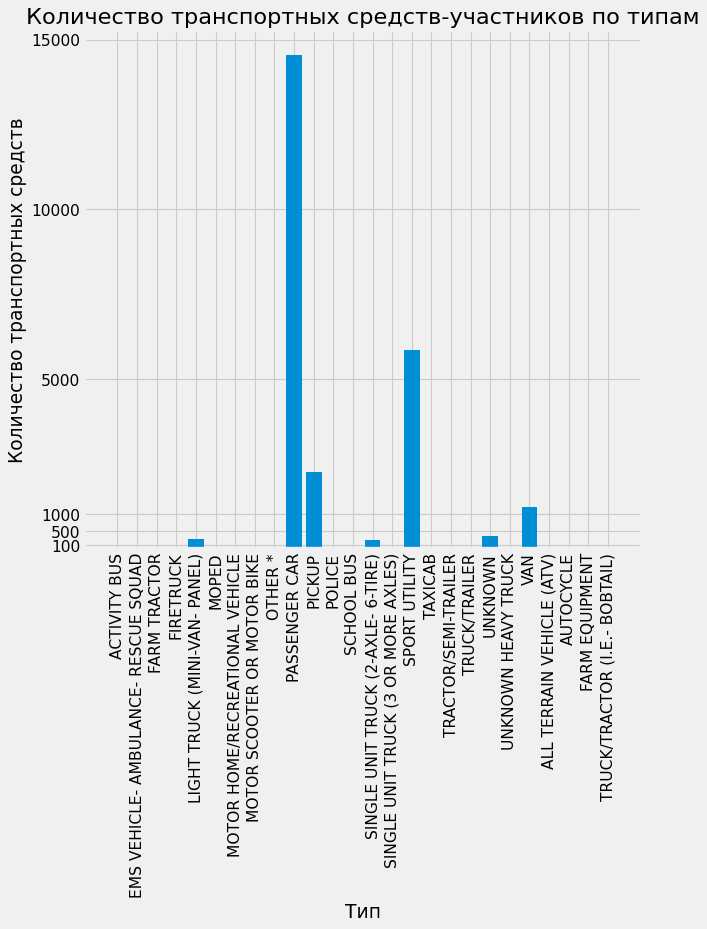

In [170]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)

    names=all_vehicle_types.keys()
    values=all_vehicle_types.values

    plt.title("Количество транспортных средств-участников по типам")
    plt.ylabel("Количество транспортных средств")
    plt.xlabel("Тип")

    plt.yticks([ 100, 500,1000,5000,10000, 15000])
    plt.xticks(rotation = 90)

    ax.bar(names, values, )
    plt.show()

## Статистика по количеству пешеходов вовлеченных в проишествие по годам

In [194]:
dataset[["Number of Pedestrians","Crash Date - Year"]].groupby(['Crash Date - Year']).sum()

,Number of Pedestrians
Crash Date - Year,
2017,30.0
2018,17.0
2019,35.0
2020,18.0
2021,21.0
2022,26.0


In [193]:
dataset[["Number of Passengers","Crash Date - Year"]].groupby(['Crash Date - Year']).sum()

,Number of Passengers
Crash Date - Year,
2017,2979.0
2018,3023.0
2019,2986.0
2020,1641.0
2021,2168.0
2022,1962.0


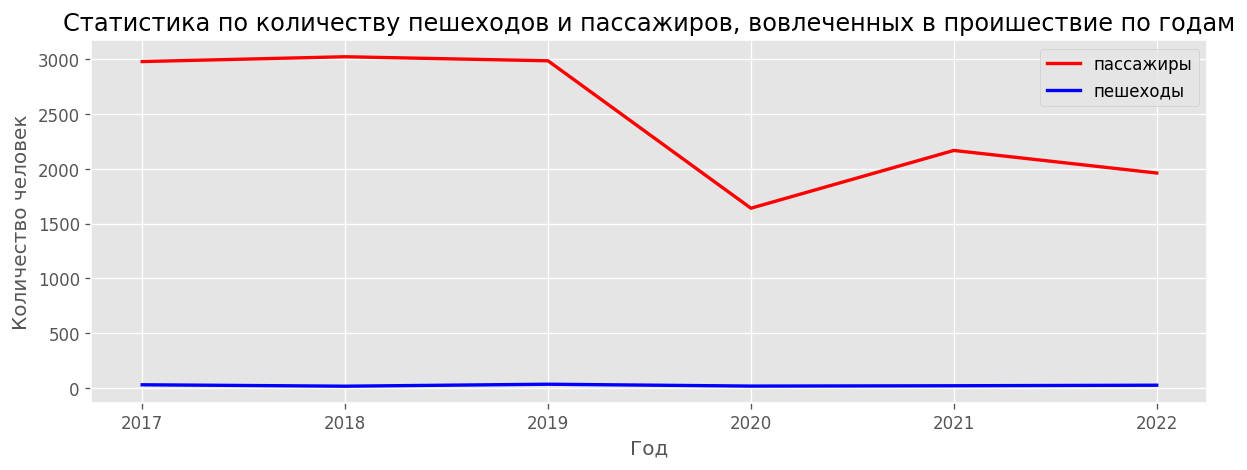

In [198]:
# Данные для графика
dates = dataset["Crash Date - Year"].unique()
values_of_passengers = dataset[["Number of Passengers","Crash Date - Year"]].groupby(['Crash Date - Year']).sum()
values_of_pedestrians = dataset[["Number of Pedestrians","Crash Date - Year"]].groupby(['Crash Date - Year']).sum()

with plt.style.context('ggplot'):
    plt.figure(figsize=(12, 4), dpi=120) 
    plt.subplot(1, 1, 1) 
    plt.title("Статистика по количеству пешеходов и пассажиров, вовлеченных в проишествие по годам")
    plt.ylabel("Количество человек")
    plt.xlabel("Год")

    plt.plot(dates,values_of_passengers, color="red", linewidth=2.0, label="пассажиры")
    plt.plot(dates,values_of_pedestrians, color="blue", linewidth=2.0, label="пешеходы")
    plt.legend()

    plt.show()